In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# zmienna wejściowa
quality_of_service = ctrl.Antecedent(np.arange(0, 10, 1), 'quality')
# zmienna wyjściowa
tip = ctrl.Consequent(np.arange(0, 20, 1), 'tip')

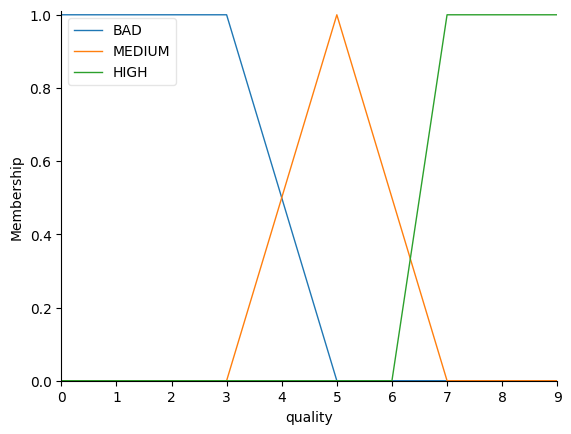

In [13]:
# funkcje przynależności do zmiennej wejściowej
quality_of_service['BAD'] = fuzz.trapmf(quality_of_service.universe, [0, 0, 3, 5])
quality_of_service['MEDIUM'] = fuzz.trimf(quality_of_service.universe, [3, 5, 7])
quality_of_service['HIGH'] = fuzz.trapmf(quality_of_service.universe, [6, 7, 10, 10])
quality_of_service.view()

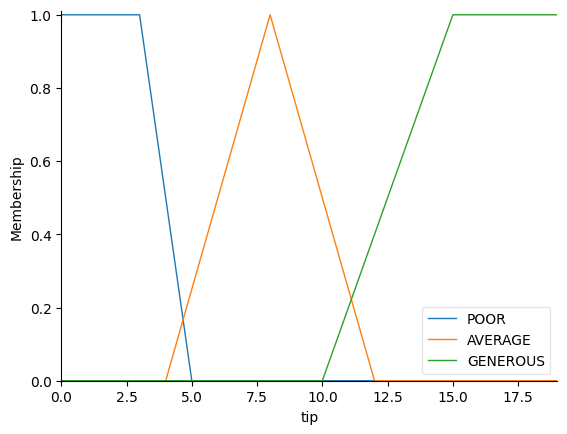

In [14]:
# funkcje przynależności do zmiennej wyjściowej
tip['POOR'] = fuzz.trapmf(tip.universe, [0, 0, 3, 5])
tip['AVERAGE'] = fuzz.trimf(tip.universe, [4, 8, 12])
tip['GENEROUS'] = fuzz.trapmf(tip.universe, [10, 15, 20, 20])
tip.view()

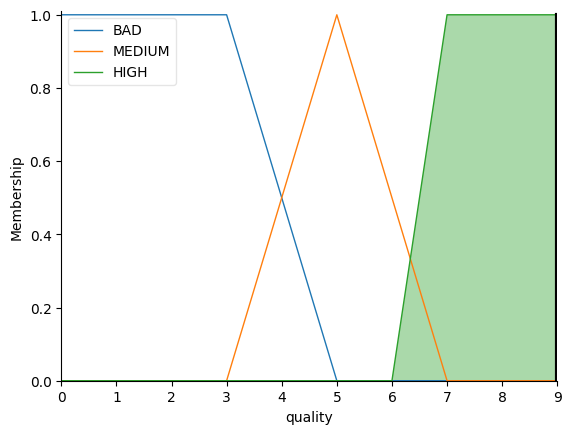

In [15]:
# reguły rozmyte
rule1 = ctrl.Rule(quality_of_service['BAD'], tip['POOR'])
rule2 = ctrl.Rule(quality_of_service['MEDIUM'], tip['AVERAGE'])
rule3 = ctrl.Rule(quality_of_service['HIGH'], tip['GENEROUS'])
# definiujemy sterownik rozmyty
# sterownik składa z reguł rozmytych
# ale same reguły składają się ze zdefiniowanych wcześniej
# wejść/wyjść
tipper_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# symulacja działania sterownika
tipper_simulation = ctrl.ControlSystemSimulation(tipper_ctrl)
# ustalamy wejście ostre (crisp)
tipper_simulation.input['quality'] = 10
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)

15.589743589743591


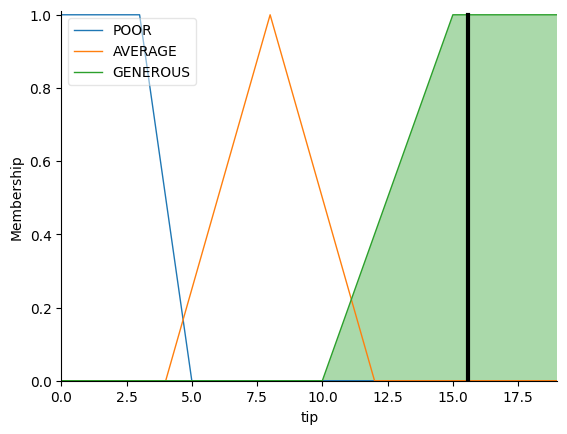

In [16]:

tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])

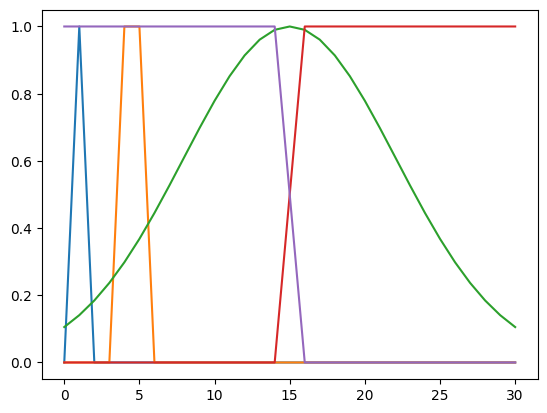

In [53]:
def tri(x, a1, a2, a3):
    if x <= a1: 
        return 0
    if a1 <= x <= a2:
        return (x - a1) / (a2 - a1)
    if a2 <= x <= a3:
        return (a3 - x) / (a3 - a2)
    return 0 

def trap(x, a1, a2, a3, a4):
    if x <= a1:
        return 0
    if a1 <= x <= a2:
        return (x - a1) / (a2 - a1)
    if a2 <= x <= a3:
        return (a4 - x) / (a4 - a3)
    return 0

def rsig(x, b, a):
    return 1 / (1 + (np.e ** (-b * (x - a))))

def lsig(x, b, a):
    return 1 / (1 + (np.e ** (b * (x - a))))

def gauss(x, a, b):
    return (np.e)**-(((x-a) / b)**2)
    
x = np.arange(0, 31)
y1 = [tri(v, 0, 1, 2) for v in x]
y2 = [trap(v, 3, 4, 5,6) for v in x]
y3 = [gauss(v, 15, 10) for v in x]
y4 = [rsig(v, 15, 15) for v in x]
y5 = [lsig(v, 15, 15) for v in x]

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)